In [1]:
import numpy as np
import pandas as pd
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.cm as cm
import itertools

import seaborn as sns
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.d03_processing.BlinkProcessor import BlinkProcessor
from src.d03_processing.fixations.SignalProcessor import SignalProcessor
from src.d03_processing.fixations.GazeCollision import GazeCollision
from src.d00_utils.TaskObjects import *
from src.d03_processing.fixations.FixationProcessor import FixationProcessor
from src.d03_processing.TimepointProcessor import TimepointProcessor
from src.d01_data.fetch.fetch_timepoints import fetch_timepoints
from src.d03_processing.aoi import collision_sphere_radius
import random

In [28]:
all_trials = pd.read_csv("C:\\Users\\Luke\\Documents\\AlloEye\\data\\feature_saves\\all_real_trials.csv")
all_trials = all_trials.trial_id.to_numpy()
n_trials = len(all_trials)
# n_trials = 13
all_viewings = []
tracklosses = {}
technicals = {}
blinks = {}
batch_i = 0
batch_limit = 400
all_viewings.append([])
for i in range(n_trials):
    if len(all_viewings[batch_i]) >= batch_limit:
        all_viewings.append([])
        batch_i += 1
    enc = f"{all_trials[i]}_enc"
    ret = f"{all_trials[i]}_ret"
    enc_ret = [enc, ret]
    all_viewings[batch_i].append(enc)
    all_viewings[batch_i].append(ret)

    
for i in range(len(all_viewings)):
    viewings = all_viewings[i]
    timepoints = fetch_timepoints("all", viewing_id=viewings)
    for viewing in viewings:
        tps = timepoints[timepoints.viewing_id == viewing].reset_index(drop=True)
        if tps is None:
            tracklosses.update({viewing: 1})
            continue
        b_tps = BlinkProcessor(tps.copy(deep=True)).timepoints
        if b_tps is None:
            blinks.update({viewing: 1})
            continue
        tracklosses.update({viewing: BlinkProcessor.total_p_trackloss(b_tps, 'trackloss')})
        technicals.update({viewing: BlinkProcessor.total_p_trackloss(b_tps, 'tech_trackloss')})
        blinks.update({viewing: BlinkProcessor.total_p_trackloss(b_tps, 'blink')})
        

executing query
SELECT * FROM "alloeye_timepoint_viewing" WHERE retrieval_epoch in ('na', 'view') and viewing_id in ('alloeye_55r1_1_enc', 'alloeye_55r1_1_ret', 'alloeye_54r1_8_enc', 'alloeye_54r1_8_ret', 'alloeye_55r1_2_enc', 'alloeye_55r1_2_ret', 'alloeye_55r1_3_enc', 'alloeye_55r1_3_ret', 'alloeye_55r1_5_enc', 'alloeye_55r1_5_ret', 'alloeye_46r1_13_enc', 'alloeye_46r1_13_ret', 'alloeye_50r2_1_enc', 'alloeye_50r2_1_ret', 'alloeye_45r1_3_enc', 'alloeye_45r1_3_ret', 'alloeye_33r1_11_enc', 'alloeye_33r1_11_ret', 'alloeye_13r2_8_enc', 'alloeye_13r2_8_ret', 'alloeye_45r1_6_enc', 'alloeye_45r1_6_ret', 'alloeye_45r1_17_enc', 'alloeye_45r1_17_ret', 'alloeye_46r1_16_enc', 'alloeye_46r1_16_ret', 'alloeye_45r2_9_enc', 'alloeye_45r2_9_ret', 'alloeye_45r2_10_enc', 'alloeye_45r2_10_ret', 'alloeye_14r1_5_enc', 'alloeye_14r1_5_ret', 'alloeye_45r2_12_enc', 'alloeye_45r2_12_ret', 'alloeye_35r1_0_enc', 'alloeye_35r1_0_ret', 'alloeye_45r2_15_enc', 'alloeye_45r2_15_ret', 'alloeye_45r3_2_enc', 'alloeye_45

C:\Users\Luke\anaconda3\envs\alloeyepy\lib\site-packages\ipywidgets\widgets\widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


(array([5.092e+03, 2.740e+02, 7.400e+01, 2.800e+01, 1.100e+01, 9.000e+00,
        4.000e+00, 1.000e+00, 2.000e+00, 3.000e+00]),
 array([0.        , 0.01293593, 0.02587186, 0.03880779, 0.05174371,
        0.06467964, 0.07761557, 0.0905515 , 0.10348743, 0.11642336,
        0.12935929]),
 <BarContainer object of 10 artists>)

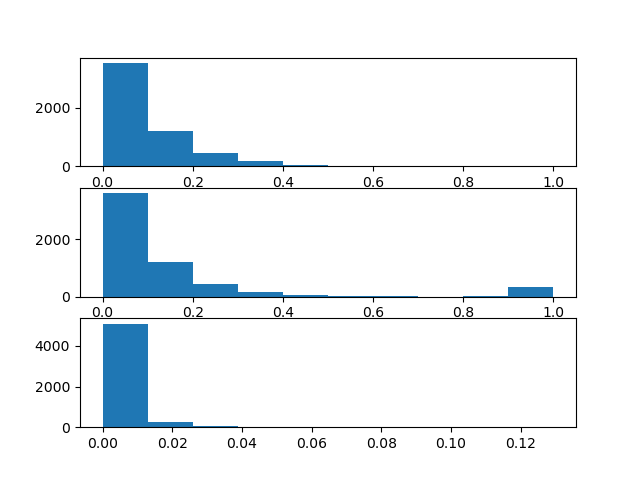

In [29]:
fig = plt.figure()
fig.add_subplot(311).hist(list(tracklosses.values()))
fig.add_subplot(312).hist(list(blinks.values()))
fig.add_subplot(313).hist(list(technicals.values()))

In [31]:
high_trackloss_viewings = []
for key, value in tracklosses.items():
    if value > 0.25:
        high_trackloss_viewings.append(key)
high_blinks = []
for key, value in blinks.items():
    if value > 0.25:
        high_blinks.append(key)

In [43]:
print(high_trackloss_viewings)

['alloeye_50r2_1_enc', 'alloeye_50r2_1_ret', 'alloeye_14r1_5_enc', 'alloeye_14r1_5_ret', 'alloeye_35r1_2_enc', 'alloeye_35r1_2_ret', 'alloeye_50r1_17_enc', 'alloeye_50r1_17_ret', 'alloeye_14r3_2_enc', 'alloeye_50r2_0_enc', 'alloeye_50r2_0_ret', 'alloeye_35r1_3_ret', 'alloeye_35r1_4_enc', 'alloeye_35r1_4_ret', 'alloeye_35r1_5_enc', 'alloeye_35r1_5_ret', 'alloeye_50r2_4_enc', 'alloeye_50r2_4_ret', 'alloeye_50r2_6_enc', 'alloeye_50r2_6_ret', 'alloeye_50r2_7_enc', 'alloeye_50r2_7_ret', 'alloeye_50r2_14_enc', 'alloeye_50r2_14_ret', 'alloeye_46r3_9_enc', 'alloeye_46r3_9_ret', 'alloeye_46r1_14_enc', 'alloeye_46r1_14_ret', 'alloeye_50r2_16_enc', 'alloeye_50r2_16_ret', 'alloeye_50r3_7_enc', 'alloeye_50r3_9_enc', 'alloeye_50r3_11_enc', 'alloeye_50r3_12_enc', 'alloeye_50r3_12_ret', 'alloeye_50r3_13_enc', 'alloeye_50r3_13_ret', 'alloeye_50r3_15_enc', 'alloeye_50r3_15_ret', 'alloeye_35r1_6_enc', 'alloeye_35r1_6_ret', 'alloeye_46r2_3_enc', 'alloeye_46r2_3_ret', 'alloeye_46r2_4_enc', 'alloeye_46r2_11

460
{'50': 75, '14': 77, '35': 38, '46': 57, '5': 35, '8': 17, '13': 9, '18': 3, '15': 2, '45': 1, '12': 1, '20': 12, '27': 60, '32': 3, '3': 30, '56': 2, '17': 1, '31': 1, '28': 1, '30': 1, '40': 3, '42': 9, '57': 2, '23': 10, '41': 6, '36': 2, '25': 1, '39': 1}


C:\Users\Luke\anaconda3\envs\alloeyepy\lib\site-packages\ipywidgets\widgets\widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


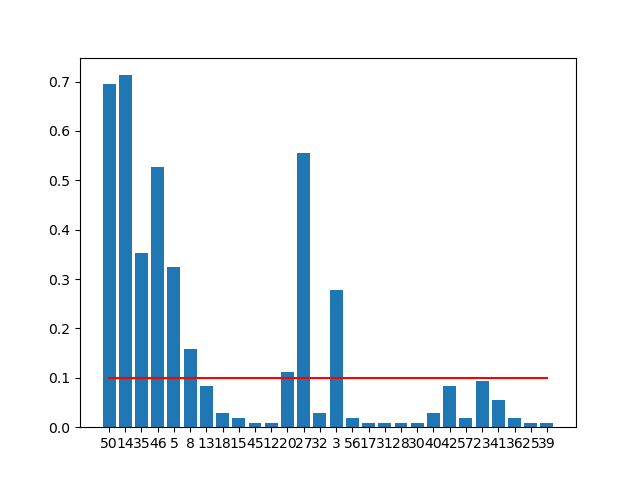

In [42]:
print(len(high_trackloss_viewings))
ppt_counts = {}
enc_ret_counts = {}
for i in range(len(high_trackloss_viewings)):
    viewing = high_trackloss_viewings[i]
    ppt = viewing.split('r')[0]
    ppt = ppt.split('alloeye_')[-1]
    if ppt in ppt_counts.keys():
        ppt_counts.update({ppt: ppt_counts[ppt] + 1})
    else:
        ppt_counts.update({ppt: 1})
    
            
print(ppt_counts)    

ax = plt.figure().add_subplot()
values = np.array(list(ppt_counts.values())) / 108
ax.bar(ppt_counts.keys(), values)
ax.plot(ppt_counts.keys(), [0.1 for i in range(len(values))], 'r-')